##1.데이터 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Dacon_track2_UnivOfSeoul_AI
!ls

/content/drive/MyDrive/Dacon_track2_UnivOfSeoul_AI
Data_Check.ipynb       dxdy_distribution.png  learning_AI.ipynb  raw_data.csv
data_description.xlsx  learning_AI2.ipynb     match_info.csv


In [ ]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv('raw_data.csv')
match_info = pd.read_csv('match_info.csv')
data_description = pd.read_excel('data_description.xlsx')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

##2.데이터 훑어보기



In [ ]:
raw_data.head(50)

,game_id,action_id,period_id,time_seconds,team_id,player_id,result_name,start_x,start_y,end_x,end_y,dx,dy,type_name,player_name_ko,team_name_ko,position_name,main_position
0,126288,0,1,1.033,2353,356625.0,Successful,52.670205,34.919632,68.628945,34.347412,15.958740,-0.572220,Pass,이영준,김천 상무 프로축구단,CF,CF
1,126288,1,1,2.433,2353,356612.0,NaN,68.628945,34.347412,68.628945,34.347412,0.000000,0.000000,Pass Received,원두재,김천 상무 프로축구단,CDM,CM
2,126288,2,1,3.033,2353,356612.0,Successful,68.228055,33.853256,65.468865,26.640292,-2.759190,-7.212964,Pass,원두재,김천 상무 프로축구단,CDM,CM
3,126288,3,1,4.333,2353,356618.0,NaN,65.468865,26.640292,65.468865,26.640292,0.000000,0.000000,Pass Received,김진규,김천 상무 프로축구단,CM,CM
4,126288,4,1,4.900,2353,356618.0,Successful,64.838025,26.766636,63.300510,43.018024,-1.537515,16.251388,Pass,김진규,김천 상무 프로축구단,CM,CM
5,126288,5,1,6.300,2353,356624.0,NaN,63.300510,43.018024,63.300510,43.018024,0.000000,0.000000,Pass Received,강현묵,김천 상무 프로축구단,CM,CM
6,126288,6,1,6.301,2353,356624.0,NaN,63.300510,43.018024,58.171995,47.553624,-5.128515,4.535600,Carry,강현묵,김천 상무 프로축구단,CM,CM
7,126288,7,1,10.114,2353,356624.0,Successful,58.171995,47.553624,65.107770,37.462016,6.935775,-10.091608,Pass,강현묵,김천 상무 프로축구단,CM,CM
8,126288,8,1,11.467,2353,356612.0,NaN,65.107770,37.462016,65.107770,37.462016,0.000000,0.000000,Pass Received,원두재,김천 상무 프로축구단,CDM,CM
9,126288,9,1,11.468,2353,356612.0,NaN,65.107770,37.462016,62.281800,43.225628,-2.825970,5.763612,Carry,원두재,김천 상무 프로축구단,CDM,CM


In [ ]:
match_info.head(50)

,game_id,season_id,competition_id,game_day,game_date,home_team_id,away_team_id,home_score,away_score,venue,competition_name,country_name,season_name,home_team_name,home_team_name_ko,away_team_name,away_team_name_ko
0,126283,3669,587,1,2024-03-01 05:00:00,2354,4639,1,0,문수월드컵경기장,K League 1,KR,2024,Ulsan HD FC,울산 HD FC,Pohang Steelers,포항 스틸러스
1,126284,3669,587,1,2024-03-01 07:30:00,4640,4657,1,1,전주월드컵경기장,K League 1,KR,2024,Jeonbuk Hyundai Motors,전북 현대 모터스,Daejeon Hana Citizen,대전 하나 시티즌
2,126285,3669,587,1,2024-03-02 05:00:00,4648,316,2,0,광주전용구장,K League 1,KR,2024,Gwangju FC,광주FC,FC Seoul,FC서울
3,126286,3669,587,1,2024-03-02 07:30:00,4646,4220,0,1,인천축구전용경기장,K League 1,KR,2024,Incheon United,인천 유나이티드,Suwon FC,수원FC
4,126287,3669,587,1,2024-03-02 07:30:00,4643,4641,1,1,송암스포츠타운 주경기장,K League 1,KR,2024,Gangwon FC,강원FC,Jeju United,제주SK FC
5,126288,3669,587,1,2024-03-03 05:00:00,4644,2353,0,1,DGB대구은행파크,K League 1,KR,2024,Daegu FC,대구FC,Gimcheon Sangmu,김천 상무 프로축구단
6,126289,3669,587,2,2024-03-09 05:00:00,4220,4640,1,1,수원종합운동장,K League 1,KR,2024,Suwon FC,수원FC,Jeonbuk Hyundai Motors,전북 현대 모터스
7,126290,3669,587,2,2024-03-09 07:30:00,4639,4644,3,1,포항스틸야드,K League 1,KR,2024,Pohang Steelers,포항 스틸러스,Daegu FC,대구FC
8,126291,3669,587,2,2024-03-09 07:30:00,2353,2354,2,3,김천종합운동장,K League 1,KR,2024,Gimcheon Sangmu,김천 상무 프로축구단,Ulsan HD FC,울산 HD FC
9,126292,3669,587,2,2024-03-10 05:00:00,4641,4657,3,1,제주월드컵경기장,K League 1,KR,2024,Jeju United,제주SK FC,Daejeon Hana Citizen,대전 하나 시티즌


##3.기초통계

In [ ]:
raw_data.describe()

,game_id,action_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,dx,dy
count,579306.000000,579306.000000,579306.000000,579306.000000,579306.000000,579305.000000,579306.000000,579306.000000,579306.000000,579306.000000,579306.000000,579306.000000
mean,126380.236524,1468.650566,1.499301,1476.147922,3833.102607,333426.837096,52.792477,34.383346,52.799981,34.388859,0.007504,0.005514
std,56.778999,855.439247,0.500000,891.317358,1377.857136,158692.532854,25.061882,20.303004,25.284071,20.241973,10.834591,9.809462
min,126283.000000,0.000000,1.000000,0.000000,316.000000,61616.000000,0.000000,0.000000,0.000000,0.000000,-92.678376,-67.141772
25%,126331.000000,731.000000,1.000000,697.500250,2354.000000,188266.000000,34.544580,16.780530,34.443806,16.802256,-2.413635,-2.523177
50%,126380.000000,1462.000000,1.000000,1453.450000,4640.000000,354813.000000,52.748535,34.437988,52.791218,34.407830,0.000000,0.000000
75%,126428.000000,2194.000000,2.000000,2241.325000,4646.000000,500145.000000,71.056440,52.176536,71.173095,52.168597,2.405760,2.564399
max,126480.000000,3519.000000,2.000000,3614.467000,4657.000000,534727.000000,105.000000,68.000000,105.000000,68.000000,99.489033,65.665472


In [ ]:
raw_data.dtypes

,0
game_id,int64
action_id,int64
period_id,int64
time_seconds,float64
team_id,int64
player_id,float64
result_name,object
start_x,float64
start_y,float64
end_x,float64


In [ ]:
raw_data.shape

(579306, 18)

In [ ]:
raw_data.columns

Index(['game_id', 'action_id', 'period_id', 'time_seconds', 'team_id',
       'player_id', 'result_name', 'start_x', 'start_y', 'end_x', 'end_y',
       'dx', 'dy', 'type_name', 'player_name_ko', 'team_name_ko',
       'position_name', 'main_position'],
      dtype='object')

In [ ]:
match_info.describe()

,game_id,season_id,competition_id,game_day,home_team_id,away_team_id,home_score,away_score,season_name
count,198.000000,198.0,198.0,198.000000,198.000000,198.000000,198.000000,198.000000,198.0
mean,126381.500000,3669.0,587.0,17.000000,3878.782828,3854.717172,1.500000,1.191919,2024.0
std,57.301832,0.0,0.0,9.546041,1351.393463,1372.837693,1.120868,1.172240,0.0
min,126283.000000,3669.0,587.0,1.000000,316.000000,316.000000,0.000000,0.000000,2024.0
25%,126332.250000,3669.0,587.0,9.000000,4220.000000,2820.500000,1.000000,0.000000,2024.0
50%,126381.500000,3669.0,587.0,17.000000,4641.000000,4640.000000,1.000000,1.000000,2024.0
75%,126430.750000,3669.0,587.0,25.000000,4645.500000,4644.000000,2.000000,2.000000,2024.0
max,126480.000000,3669.0,587.0,33.000000,4657.000000,4657.000000,5.000000,6.000000,2024.0


In [ ]:
match_info.dtypes

,0
game_id,int64
season_id,int64
competition_id,int64
game_day,int64
game_date,object
home_team_id,int64
away_team_id,int64
home_score,int64
away_score,int64
venue,object


In [ ]:
match_info.shape

(198, 17)

In [ ]:
match_info.columns

Index(['game_id', 'season_id', 'competition_id', 'game_day', 'game_date',
       'home_team_id', 'away_team_id', 'home_score', 'away_score', 'venue',
       'competition_name', 'country_name', 'season_name', 'home_team_name',
       'home_team_name_ko', 'away_team_name', 'away_team_name_ko'],
      dtype='object')

##4.결측치, 이상치 찾아보기

### (1) 결측치

In [ ]:
raw_data.isnull().sum()

,0
game_id,0
action_id,0
period_id,0
time_seconds,0
team_id,0
player_id,1
result_name,349604
start_x,0
start_y,0
end_x,0


In [ ]:
match_info.isnull().sum()

,0
game_id,0
season_id,0
competition_id,0
game_day,0
game_date,0
home_team_id,0
away_team_id,0
home_score,0
away_score,0
venue,0


###(2) 이상치

* raw_data 이상치

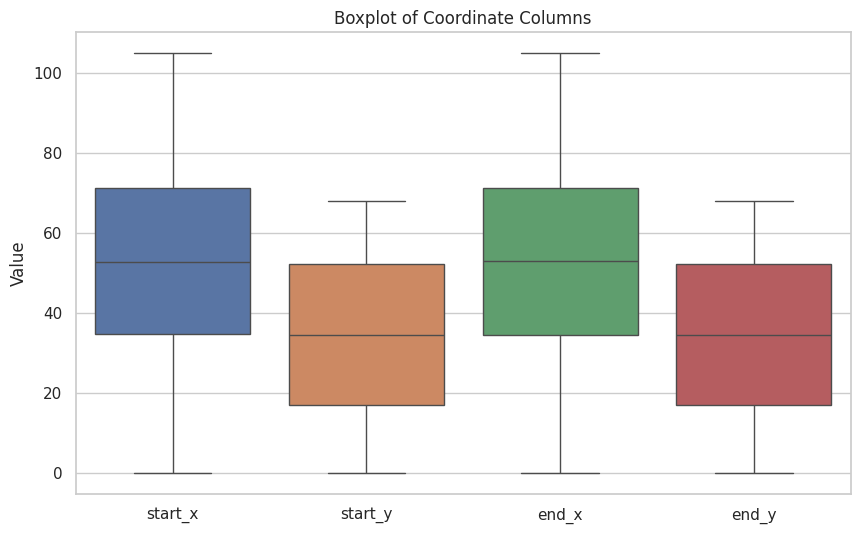

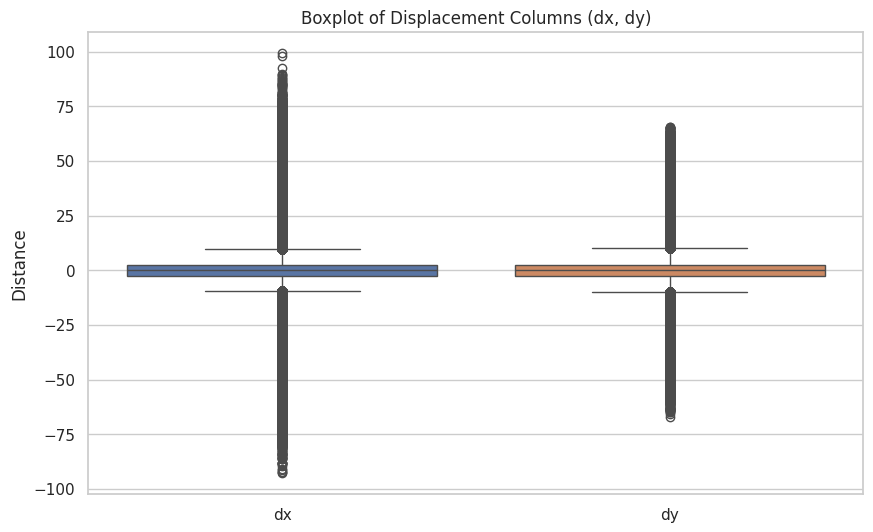

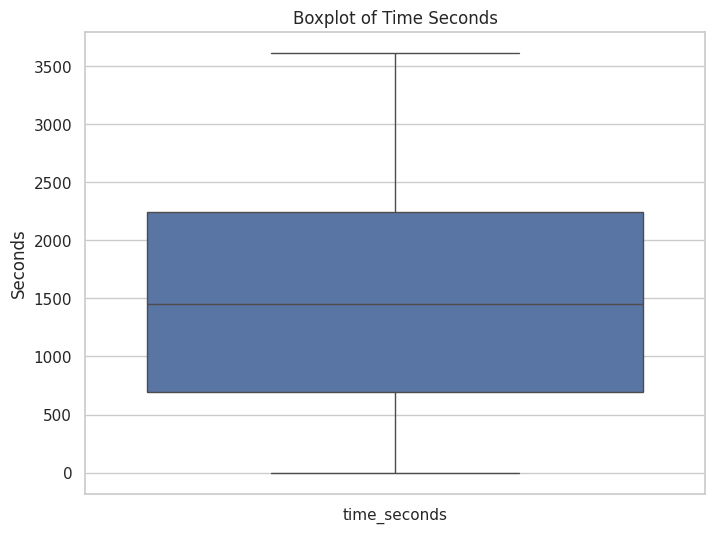

=== Outlier Report (IQR Method) ===
[start_x] 이상치 개수: 0개 (0.00%)
[start_y] 이상치 개수: 0개 (0.00%)
[end_x] 이상치 개수: 0개 (0.00%)
[end_y] 이상치 개수: 0개 (0.00%)
[dx] 이상치 개수: 125215개 (21.61%)
[dy] 이상치 개수: 124119개 (21.43%)
[time_seconds] 이상치 개수: 0개 (0.00%)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정 (한글 깨짐 방지를 위해 기본 스타일 사용 또는 폰트 설정 필요)
sns.set_theme(style="whitegrid")

# 분석할 컬럼 그룹화
coord_cols = ['start_x', 'start_y', 'end_x', 'end_y']
diff_cols = ['dx', 'dy']
time_cols = ['time_seconds']

# --- 시각화 1: 좌표 데이터 (start/end x, y) ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=raw_data[coord_cols])
plt.title('Boxplot of Coordinate Columns')
plt.ylabel('Value')
plt.show()

# --- 시각화 2: 변위 데이터 (dx, dy) ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=raw_data[diff_cols])
plt.title('Boxplot of Displacement Columns (dx, dy)')
plt.ylabel('Distance')
plt.show()

# --- 시각화 3: 시간 데이터 (time_seconds) ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=raw_data[time_cols])
plt.title('Boxplot of Time Seconds')
plt.ylabel('Seconds')
plt.show()

# 4. 수치 기반 이상치 확인 (IQR 방식)
def print_outlier_report(data, columns):
    print("=== Outlier Report (IQR Method) ===")
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        count = len(outliers)
        percentage = (count / len(data)) * 100

        print(f"[{col}] 이상치 개수: {count}개 ({percentage:.2f}%)")

print_outlier_report(raw_data, coord_cols + diff_cols + time_cols)

In [ ]:
#dx, dy값 이상치가 너무 많아서 추가 조사

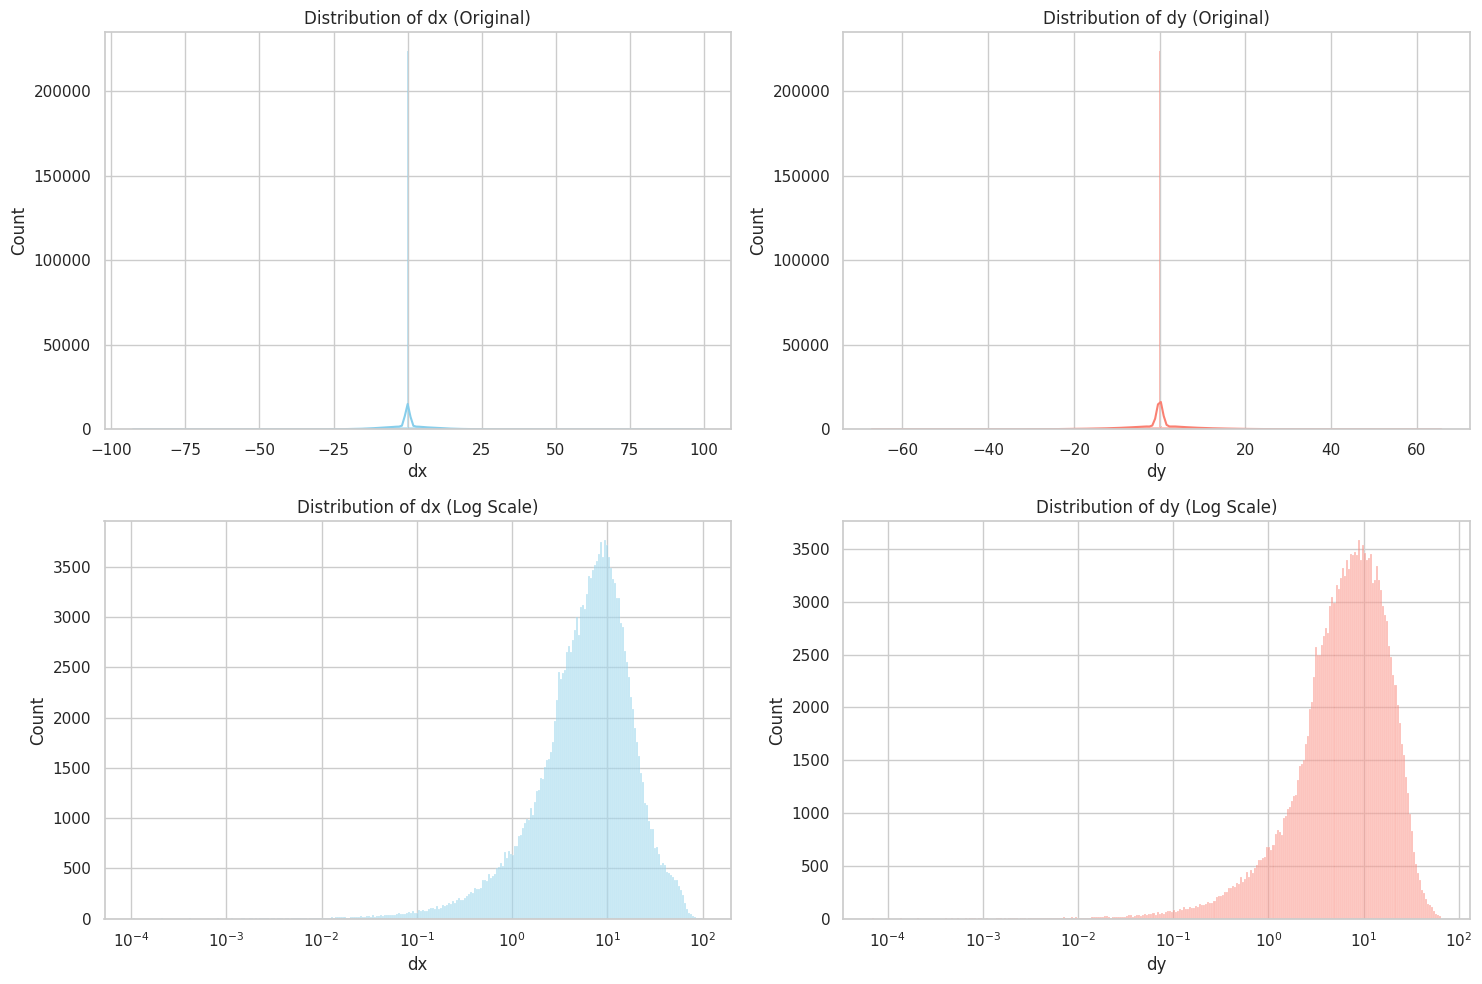

In [ ]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 2. dx 히스토그램 & 밀도 그래프
sns.histplot(data=raw_data, x='dx', kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of dx (Original)')

# 3. dy 히스토그램 & 밀도 그래프
sns.histplot(data=raw_data, x='dy', kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of dy (Original)')

# 4. dx 로그 스케일 적용 (데이터에 0이 있을 경우를 대비해 아주 작은 값을 더함)
# 이상치가 너무 멀리 떨어져 있을 때 분포를 더 자세히 보기 위함입니다.
sns.histplot(data=raw_data, x='dx', kde=True, ax=axes[1, 0], color='skyblue', log_scale=True)
axes[1, 0].set_title('Distribution of dx (Log Scale)')

# 5. dy 로그 스케일 적용
sns.histplot(data=raw_data, x='dy', kde=True, ax=axes[1, 1], color='salmon', log_scale=True)
axes[1, 1].set_title('Distribution of dy (Log Scale)')

plt.tight_layout()
plt.savefig('dxdy_distribution.png')
plt.show()

In [ ]:
# 움직임이 0인 데이터가 많음
# 그러나 축구 데이터인 만큼 이상치로 나온 데이터가 의미 없지는 않을 것

# IQR 배수를 1.5에서 3.0 이상으로 높일지? 혹은 그대로 둘지?
# 분석 모델에 넣을 때 원본 데이터 보다는 로그 변환해서 분포 완만하게 만든 데이터를 사용하는게 어떤지?

* match_info 이상치

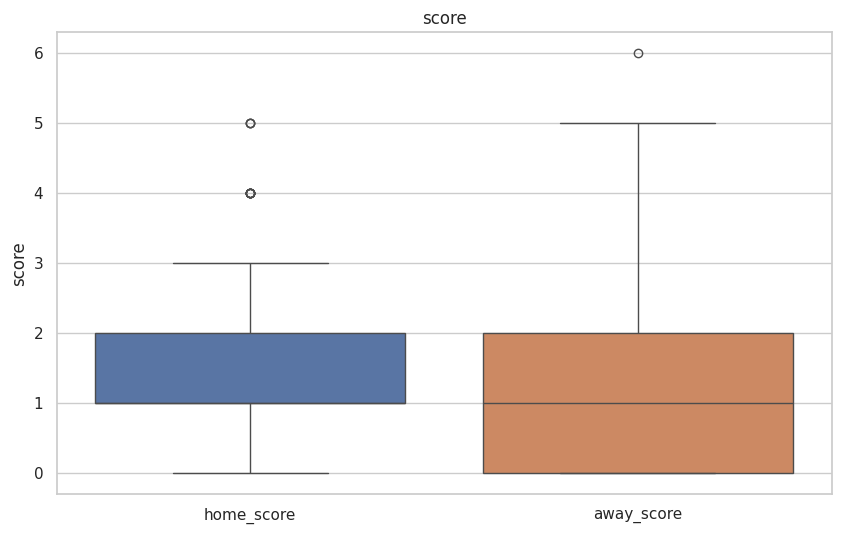

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=match_info[['home_score','away_score']])
plt.title('score')
plt.ylabel('score')
plt.show()

# 이 정도 이상치는 봐줄 수 있지 않나?

##5.시각화

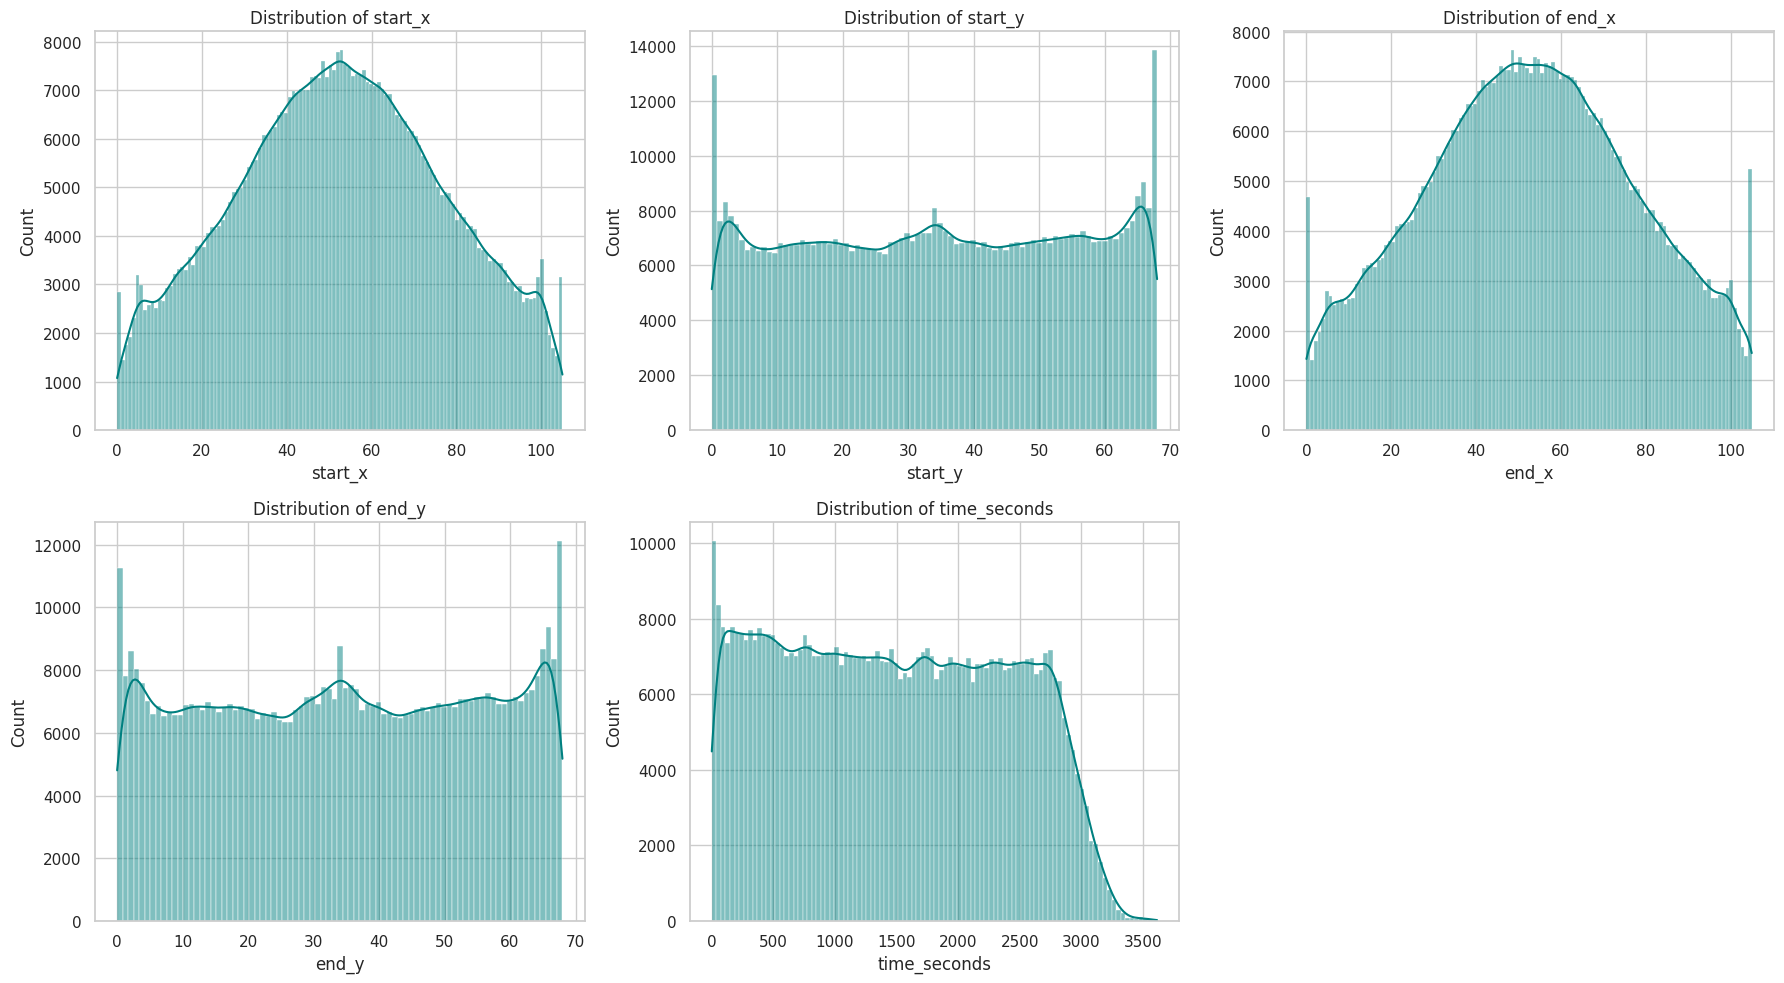

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

target_cols = ['start_x', 'start_y', 'end_x', 'end_y', 'time_seconds']

for i, col in enumerate(target_cols):
    sns.histplot(raw_data[col], kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'Distribution of {col}')

# 남는 서브플롯은 비워둠
axes[-1].axis('off')
plt.tight_layout()
plt.show()

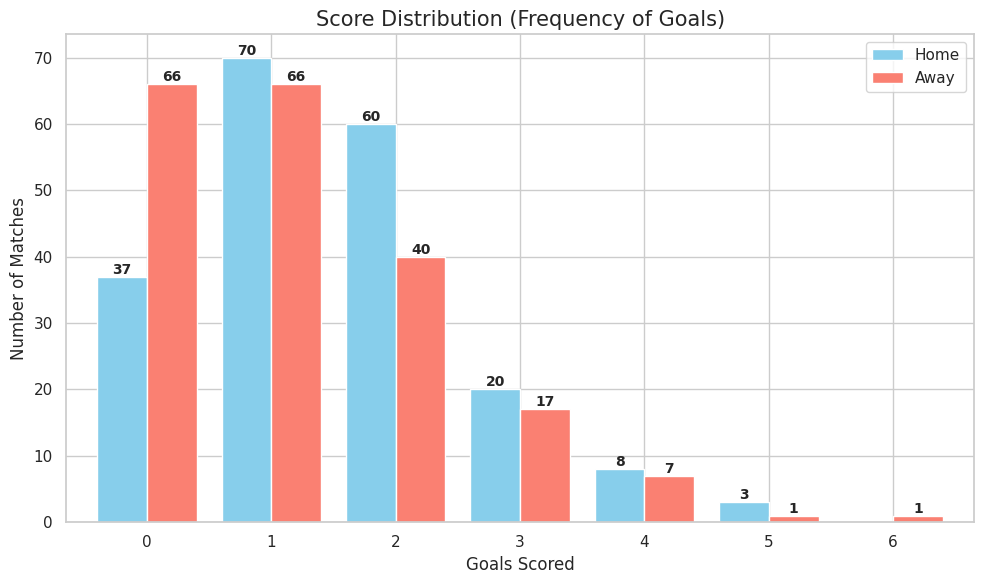

--- 득점 빈도 요약 ---
   Home  Away
0    37    66
1    70    66
2    60    40
3    20    17
4     8     7
5     3     1
6     0     1

홈 무득점(0골) 경기 수: 37회
어웨이 무득점(0골) 경기 수: 66회


In [ ]:
# 홈 팀과 어웨이 팀의 득점 빈도 계산
# 각 점수별로 몇 번이나 발생했는지 카운트하고 하나로 합칩니다.
score_counts = pd.concat([
    match_info['home_score'].value_counts().rename('Home'),
    match_info['away_score'].value_counts().rename('Away')
], axis=1).fillna(0).astype(int).sort_index()

# 3. 시각화 설정
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# 막대 그래프 그리기
score_counts.plot(kind='bar', color=['skyblue', 'salmon'], ax=plt.gca(), width=0.8)

# 그래프 제목 및 라벨 설정
plt.title('Score Distribution (Frequency of Goals)', fontsize=15)
plt.xlabel('Goals Scored', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=0) # x축 수치 똑바로 세우기

# 4. 막대 위에 숫자 표시 (데이터 레이블 추가)
for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.gca().annotate(f'{int(p.get_height())}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. 요약 수치 출력
print("--- 득점 빈도 요약 ---")
print(score_counts)
print(f"\n홈 무득점(0골) 경기 수: {score_counts.loc[0, 'Home']}회")
print(f"어웨이 무득점(0골) 경기 수: {score_counts.loc[0, 'Away']}회")

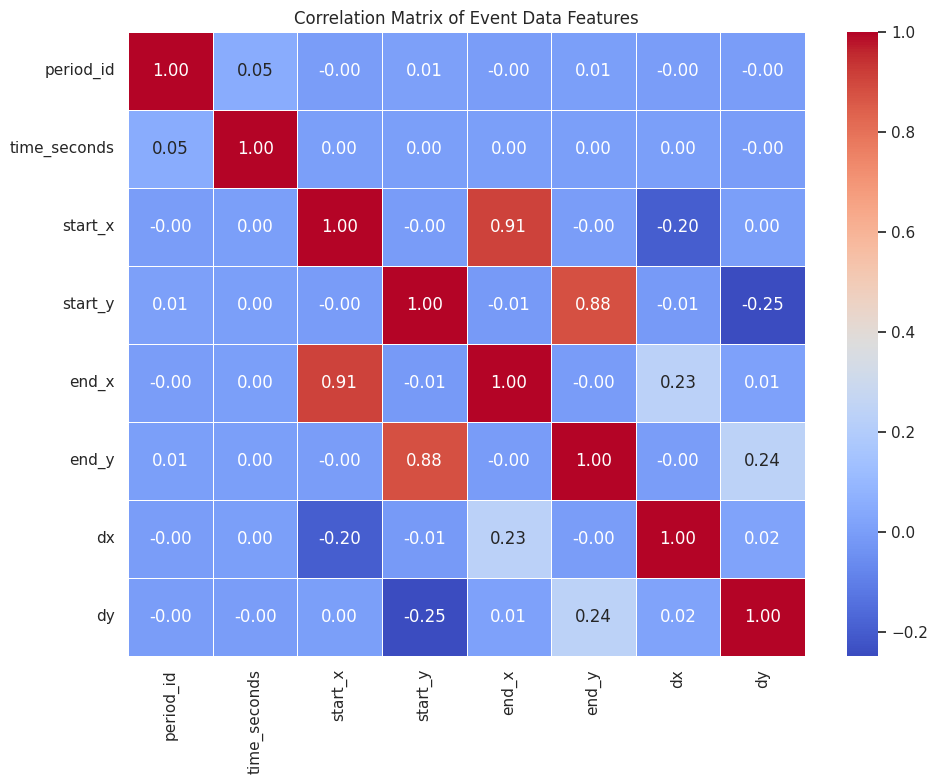

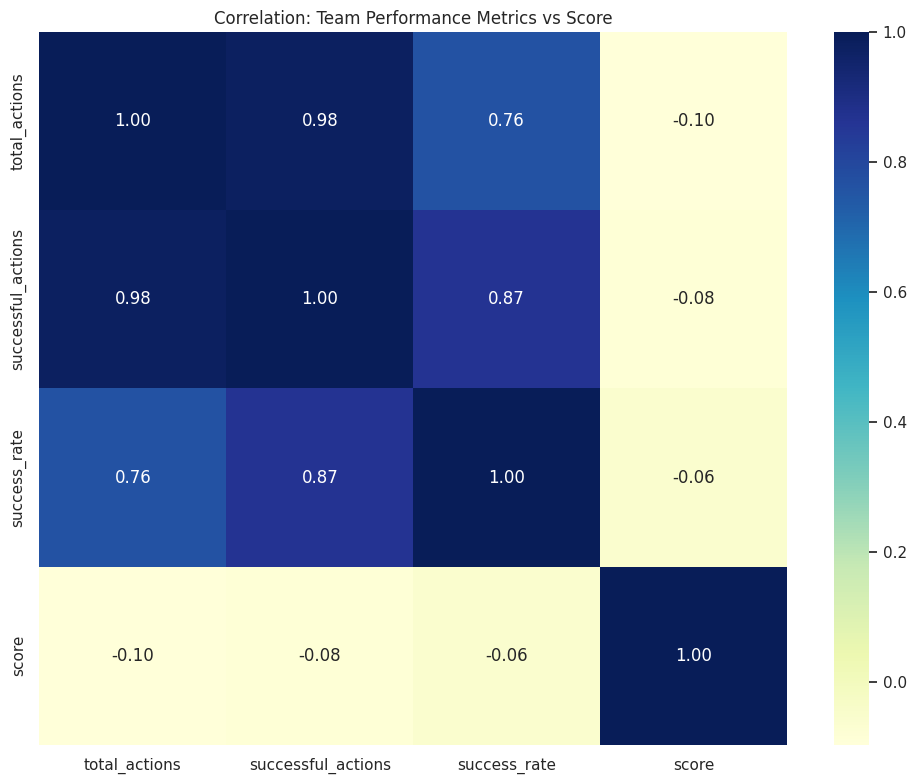

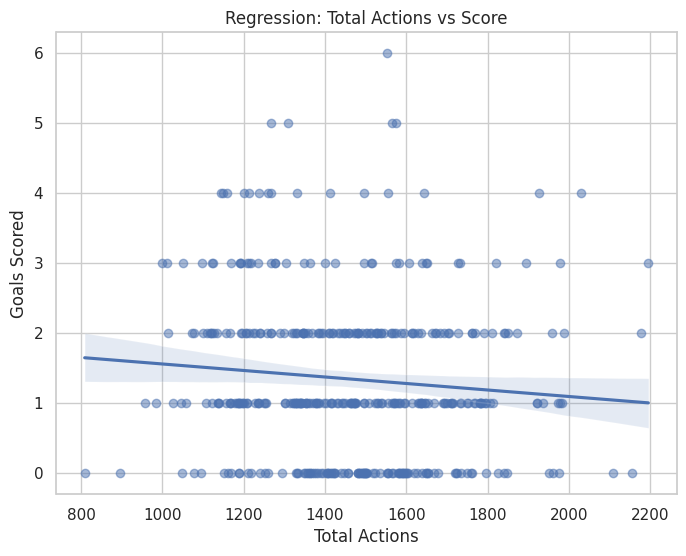

In [ ]:
# --- [그래프 1] 이벤트 데이터 특성 간 상관관계 ---

# 분석에 사용할 수치형 컬럼 선택
cols_to_corr = ['period_id', 'time_seconds', 'start_x', 'start_y', 'end_x', 'end_y', 'dx', 'dy']
corr_matrix = raw_data[cols_to_corr].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Event Data Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()


# --- [그래프 2] 팀 성적 지표와 득점 간 상관관계 ---

# 2. 팀별/경기별 득점 데이터 정리 (match_info 활용)
home_stats = match_info[['game_id', 'home_team_id', 'home_score']].rename(
    columns={'home_team_id': 'team_id', 'home_score': 'score'}
)
away_stats = match_info[['game_id', 'away_team_id', 'away_score']].rename(
    columns={'away_team_id': 'team_id', 'away_score': 'score'}
)
match_scores = pd.concat([home_stats, away_stats])

# 3. 팀별 활동량 및 성공률 계산 (raw_data 활용)
raw_data['is_success'] = (raw_data['result_name'] == 'Successful').astype(int)
team_perf = raw_data.groupby(['game_id', 'team_id']).agg(
    total_actions=('action_id', 'count'),
    successful_actions=('is_success', 'sum')
).reset_index()

team_perf['success_rate'] = team_perf['successful_actions'] / team_perf['total_actions']

# 4. 데이터 병합 (지표 + 실제 점수)
final_stats = pd.merge(team_perf, match_scores, on=['game_id', 'team_id'])

# 5. 상관관계 행렬 계산 및 시각화
success_corr = final_stats[['total_actions', 'successful_actions', 'success_rate', 'score']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(success_corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation: Team Performance Metrics vs Score')
plt.tight_layout()
plt.savefig('performance_correlation_heatmap.png')
plt.show()

# 6. 추가: 액션 수와 득점 간의 회귀 분석 그래프
plt.figure(figsize=(8, 6))
sns.regplot(data=final_stats, x='total_actions', y='score', scatter_kws={'alpha':0.5})
plt.title('Regression: Total Actions vs Score')
plt.xlabel('Total Actions')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.savefig('action_score_regression.png')
plt.show()

In [ ]:
# start\_x와 end\_x (0.91), start_y와 end_y (0.88) 사이의 매우 높은 상관관계가 관찰됨.
# 이는 대부분의 플레이(패스, 드리블 등)가 짧은 거리 내에서 이루어짐을 의미

# total actions가 goals scored와 상관 별로 없음.
# 단순한 액션보다 점수에 득점을 주는 이벤트가 중요
# 하지만 득점 만드는 이벤트 만들기 위해선 패스같은 이벤트도 필요 -> 딥러닝 학습 가능?

##6.걍 궁금한거

In [ ]:
# 팀이 '김천 상무 프로 축구단'과 '대구FC' 밖에 없는 게 맞는지 확인하는 코드 -> 아님. 여러개 있음
print(raw_data['team_name_ko'].unique())

# 각 팀의 데이터 개수 확인
raw_data['team_name_ko'].value_counts()

['김천 상무 프로축구단' '대구FC' '강원FC' '인천 유나이티드' 'FC서울' '포항 스틸러스' '수원FC' '울산 HD FC'
 '광주FC' '제주SK FC' '대전 하나 시티즌' '전북 현대 모터스']


,count
team_name_ko,
울산 HD FC,53492
광주FC,51701
FC서울,50233
포항 스틸러스,49779
수원FC,49075
강원FC,48150
인천 유나이티드,48136
김천 상무 프로축구단,47714
전북 현대 모터스,47032


In [ ]:
# raw_data랑 match_info랑 정보가 겹지나?
# 응...눈으로 확인해 본 결과 맞는 듯

In [ ]:
data_description

,file_name,column_name,description,data_type,notes
0,raw_data.csv,game_id,경기를 구분하는 고유 ID,int64,NaN
1,raw_data.csv,action_id,경기 내 이벤트 순서,int64,0부터 시작
2,raw_data.csv,period_id,"전/후반 구분 (1: 전반, 2: 후반...)",int64,1부터 시작
3,raw_data.csv,time_seconds,Period 시작 후 지난 시간 (초),float64,NaN
4,raw_data.csv,relative_time_seconds,연관된 이벤트의 발생 시각,float64,NaN
5,raw_data.csv,team_id,이벤트를 수행한 팀 ID,int64,NaN
6,raw_data.csv,player_id,이벤트를 수행한 선수 ID,float64,NaN
7,raw_data.csv,relative_player_id,연관된 선수 ID (예: 패스 리시버),float64,NaN
8,raw_data.csv,result_name,이벤트의 성공/실패 여부,object,이벤트_타입 시트 참고
9,raw_data.csv,start_x,이벤트 시작 X좌표 (L->R 공격 통일),float64,"1) 피파 공식 권장 경기장 규격인 105 x 68 크기의 그리드에 매핑한 상대 좌표 값\n2) (L→R 공격 통일)이라는 표현은, 실제 경기에서 전/후반 팀의 공격 방향이 바뀌더라도, 모든 이벤트 데이터가 좌우, 상하 반전되어 항상 왼쪽(x=0)에서 오른쪽(x=105)으로 공격하는 것을 기준으로 좌표를 기록했다는 의미"


In [ ]:
data_description.shape

(38, 5)

In [ ]:
raw_data['result_name'].unique()

array(['Successful', nan, 'Unsuccessful', 'Off Target', 'Yellow_Card',
       'On Target', 'Blocked', 'Low Quality Shot', 'Goal',
       'Direct_Red_Card', 'Keeper Rush-Out', 'Second_Yellow_Card'],
      dtype=object)

In [ ]:
raw_data['type_name'].unique()

array(['Pass', 'Pass Received', 'Carry', 'Block', 'Out', 'Throw-In',
       'Intervention', 'Recovery', 'Interception', 'Clearance', 'Duel',
       'Tackle', 'Offside', 'Pass_Freekick', 'Error', 'Foul', 'Cross',
       'Goal Kick', 'Shot', 'Aerial Clearance', 'Catch', 'Take-On',
       'Pause', 'Ball Received', 'Parry', 'Pass_Corner', 'Hit',
       'Defensive Line Support', 'Goal Miss', 'Goal', 'Deflection',
       'Penalty Kick', 'Goal Post', 'Handball_Foul', 'Shot_Freekick',
       'Own Goal', 'Foul_Throw'], dtype=object)